# Modelleren van een rupsenuitbraak volgens de exponentiële groei

## Ecologen modelleren

**Ecologen bestuderen hoe levende organismen interageren met andere levende organismen en met hun omgeving.**

Een van de meest fundamentele vragen die ze proberen te beantwoorden, is hoe een populatie van dieren, planten, bacteriën of mensen verandert doorheen de tijd. Groeit ze? Daalt ze? Stagneert ze? Gaat de populatie op en neer? Kan ze plots imploderen?

Dit soort vragen beantwoorden ecologen aan de hand van **groeimodellen**: wiskundige vergelijkingen die de (verwachte) groei doorheen de tijd voorstellen.

> **Note**
> In dit hoofdstuk bekijken we een eenvoudig groeimodel: de exponentiële groei. We zullen dit model gebruiken om de grootte van de buxusmotpopulatie in een tuin te beschrijven, en stellen hierbij vast dat deze al snel erg grote waarden kan aannemen!

## Ontmoet de buxusmot

Vele insecten zijn nuttig, maar vaak vormen ze een plaag wanneer ze de planten opvreten. Zo is de rups van de buxusmot (Cydalima perspectalis) een nachtmerrie voor elke tuinier met een mooie buxushaag. De buxusmot is een invasieve soort in Europa met een grote economische kost. Meer informatie lees je op de [website van ILVO](https://ilvo.vlaanderen.be/nl/dossiers/buxusmot).

![Buxusmot](files/buxusmot.jpg "https://commons.wikimedia.org/wiki/File:Raupe_des_Buchsbaumz%C3%BCnsler,_Cydalima_perspectalis_11.JPG")

Omdat deze rups zo schadelijk is, zijn ecologen en gewasbeschermers erg geïnteresseerd om de groei van populaties op te volgen en te modelleren. **Wiskundige modellen helpen hen om in te schatten of de populatie binnen een aanvaardbare grootte blijft of wanneer ze dreigt uit haar voegen te treden en bestrijding nodig is.**

## Veronderstellingen van ons model

Het doel is om een rij te bekomen die de populatiegrootte doorheen de tijd voorstelt:<br>
<em><b>u<sub>0</sub>, u<sub>1</sub>, u<sub>2</sub>, ..., u<sub>t - 1</sub>, u<sub>t</sub>, ...</b></em>

Hierbij geldt:<br>
-  <em>u<sub>0</sub></em> is de initiële populatiegrootte: het aantal rupsen bij het begin van de metingen.
-  <em>u<sub>t</sub></em> stelt de populatiegrootte voor op generatie of tijdstip <em>t</em>.
-  <em>t</em> neemt de waarden <em>0, 1, 2, 3, ...</em> aan.

<strong>Stel dat <em>u<sub>t - 1</sub></em>, het aantal rupsen op het tijdstip <em>t - 1</em>, gekend is. Wat is dan <em>u<sub>t</sub></em>, met andere woorden hoeveel rupsen zijn er dan op tijdstip <em>t</em>?</strong>

Je gaat dus op zoek naar een vergelijking die vertelt wat de populatiegrootte op tijdstip *t* is, gegeven het aantal rupsen op tijdstip *t - 1*.

**Een wiskundig model is altijd een vereenvoudiging van de werkelijkheid.** Hier zal je een rupsenpopulatie modelleren in niet-overlappende generaties.

Om te beginnen ga je uit van drie **veronderstellingen** voor zo'n vergelijking:<br>

-  De vergelijking is *determistisch*: eenzelfde aantal op tijdstip *t - 1* resulteert altijd in eenzelfde aantal op tijdstip *t*. Er wordt dus geen rekening gehouden met willekeurige fluctuaties.

-  De populatiegrootte kan voorgesteld worden aan de hand van reële getallen in plaats van natuurlijke getallen. In werkelijkheid zijn er geen (levende) 'halve' rupsen; voor wie zich niet helemaal lekker voelt bij fracties van rupsen, je kan ook over *u<sub>t</sub>* denken als de biomassa van rupsen, de totale massa van de rupsen op tijdstip *t*. Bij aanzienlijke populatiegroottes kan met een eenheid van 100 of 1000 gewerkt worden, waardoor de aantallen door kommagetallen weergegeven kunnen worden.

-  De *tijd* tikt *discreet* door: de populatiegrootte wordt bekeken in een rij van perfect gescheiden generaties. Een model geeft de populatiegroottes aan op tijdstippen *0, 1, 2, 3, ...*. Het houdt bijvoorbeeld geen steek om te kijken naar tijdstip *2,4*. Er is niets tussen de generaties!

Een discreet model kan je dus zien als een soort van uurwerk dat verder tikt. Elke stap wordt dezelfde regel toegepast op een variabele, om van de huidige generatie naar de volgende te gaan. In de latere hoofdstukken van dit boekje zullen we elk van de bovenstaande veronderstellingen versoepelen om zo meer realistischere modellen te bekomen.

Afhankelijk van de manier waarop je de regel concretiseert, bekom je een ander model. In de latere onderdelen van dit leerpad zal je elk van de bovenstaande veronderstellingen versoepelen om zo realistischere modellen te bekomen.

Je start met twee discrete modellen:

- Exponentiële groei, waar de populatie ofwel snel uitsterft ofwel blijft groeien zonder rem;

- Logistische groei, waar de populatie wel een limiet heeft en een veel rijker gedrag kan vertonen.

Laat ons beginnen!

## Ongebonden exponentiële groei

Vele insecten willen zo veel mogelijk nakomelingen als mogelijk voorbrengen. In een generatie verpopt een buxusmotrups zich tot een buxusmot, welke nieuwe eitjes legt op een nieuwe haag. Uit deze eitjes kruipen nieuwe rupsen en de cyclus herbegint. Het leven van een insect is echter niet zonder gevaar. Op elk moment in de cyclus kunnen eitjes, rupsen, poppen en motten sterven door predatie van vogels, pesticiden, uithongering of andere gevaren. Als we echter gemiddeld kijken kunnen we aannemen dat elke rups aanleiding geeft tot een bepaald aantal nieuwe rupsen in de volgende generatie. Dit leidt tot de volgende regel:

$$u_t = a \cdot u_{t - 1}$$

waarbij $a > 0$ de groeifactor is. In Python kunnen we deze regel eenvoudig voorstellen als:

In [1]:
# bereken de populatiegrootte na één generatie
def exponentiele_groei(u, a):
    return a * u

waarbij `exponentiele_groei` een functie is die de regel implementeert. Deze functie doet eigenlijk niks anders dan $a$ vermenigvuldigen met $u$, wat kan aan de hand van een asterisk `*`.

De groeifactor $a$ stelt het gemiddeld aantal nakomelingen per rups voor. Je werkt met gemiddelden, dus kommagetallen zoals $0,2$ en $3,1$ zijn toegestaan, maar negatieve getallen houden geen steek.

Wiskundige modellen verwerken getallen. Je onderscheidt toestanden (hier de variabele $u$) en parameters (hier de groeifactor $a$). De toestand is de eenheid waarin we geïntereseerd zijn en verandert doorheen de simulatie. De parameters zijn grootheden die vastliggen gedurende de simulatie en het gedrag van het model beïnvloeden.

Denk even na over de gevolgen van de waarde van $a$:

- Als $a < 1$ brengt elke rups minder dan één rups voort per generatie. In elke tijdstap wordt de populatie kleiner en kleiner tot ze uiteindelijk uitsterft.

- Indien $a > 1$ zal elke rups aanleiding geven tot meer dan één nieuwe rups in de volgende generatie. De populatie zal groeien.

- In het randgeval waarbij $a = 1$ is de populatiegroote stabiel: de geboorte van nieuwe rupsen compenseert voor de sterfte.

Aangezien we hier naar plaaginsecten kijken, zal de groeifactor hoogstwaarschijnlijk groter dan 1 zijn.

Experimenteer eens met $a = 1.8$, waarbij elke rups gemiddeld gezien leidt tot iets minder dan twee nieuwe rupsen per generatie:

In [2]:
a = 1.8

Je moet nu enkel nog de waarde van een initiële $u_0$ bepalen, de populatiegrootte op $t = 0$. We beginnen met een bescheiden populatie van vijf rupsen:

In [3]:
u_0 = 5

Pas nu de functie toe:

In [4]:
u_1 = exponentiele_groei(u_0, a)
print(u_1)

9.0


Stel vast dat een decimaal getal (een `float`) teruggegeven wordt: dit komt omdat ook de parameter $a$ een decimaal getal is.

Zoals verwacht zie je net geen verdubbeling van de populatie. Aangezien er voor elke rups in de huidige generatie gemiddeld 1,8 nieuwe rupsen aangemaakt worden, neemt het aantal rupsen tussen elke generatie met 80% toe. Deze waarde wordt het **groeipercentage** genoemd, en wordt voorgesteld door de parameter $r$. We vinden dan ook:

$$u_t = a \cdot u_{t - 1} = (1 + r) \cdot u_{t - 1}$$

Om nog een generatie verder te gaan, pas je de functie `exponentiele_groei` één keer toe op $u_1$, ofwel twee keer toe op $u_0$:

In [5]:
u_2 = exponentiele_groei(u_1, a)
print(u_2)

16.2


In [6]:
u_2 = exponentiele_groei(exponentiele_groei(u_0, a), a)
print(u_2)

16.2


Ga zo verder naar de derde en de vierde generatie:

In [7]:
u_3 = exponentiele_groei(u_2, a)
print(u_3)

29.16


In [8]:
u_4 = exponentiele_groei(u_3, a)
print(u_4)

52.488


Je ziet dat de populatie na vier generaties al meer dan tien keer zo groot geworden is.

Dit model laat toe om een gesloten uitdrukking te bekomen voor de populatiegrootte doorheen de tijd:

$$u_t = u_0 \cdot a^t, t = 0, 1, 2, \ldots$$

Aangezien dit een exponentiële functie is, wordt dit groeimodel de exponentiële groei genoemd. De implementatie is relatief eenvoudig:

In [9]:
# bereken de populatiegrootte na meerdere generaties
def exponentieel_model(t, u_0=5, a=1.8):
    # a ** t komt overeen met a tot de macht t
    return u_0 * a ** t

Stel vast dat dit model tot hetzelfde resultaat leidt als voordien:

In [10]:
for t in range(5):
    print(f'u_{t} = {exponentieel_model(t):.3f}')

u_0 = 5.000
u_1 = 9.000
u_2 = 16.200
u_3 = 29.160
u_4 = 52.488


Hierbij hebben we gebruik gemaakt van `f-strings`, die toelaten om variabelen tussen accolades `{` en `}` te gebruiken. Verder zorgt de notatie `:.3f` ervoor dat er drie decimalen gebruikt worden bij het uitprinten.

### Opdracht 1

Experimenteer even met de aangeboden functie, door verschillende startwaarden $u_0$ en groeifactoren $a$ te gebruiken. Bereken zelf eerst de waarden $u_1$, $u_2$ en $u_3$, en vergelijk met het resultaat hier.

In [11]:
for t in range(5):
    print(f'x_{t} = {exponentieel_model(t, u_0=1):.3f}')

x_0 = 1.000
x_1 = 1.800
x_2 = 3.240
x_3 = 5.832
x_4 = 10.498


In [12]:
for t in range(5):
    print(f'x_{t} = {exponentieel_model(t, a=3):.3f}')

x_0 = 5.000
x_1 = 15.000
x_2 = 45.000
x_3 = 135.000
x_4 = 405.000


In [13]:
for t in range(5):
    print(f'x_{t} = {exponentieel_model(t, u_0=1, a=3):.3f}')

x_0 = 1.000
x_1 = 3.000
x_2 = 9.000
x_3 = 27.000
x_4 = 81.000


Maak nu een figuur waarin de populatiegrootte geplot wordt voor tien generaties door gebruik te maken van `matplotlib` en `numpy`. Dit kan aan de hand van een spreidingsdiagram, een grafiek waarin individuele punten getoond worden:

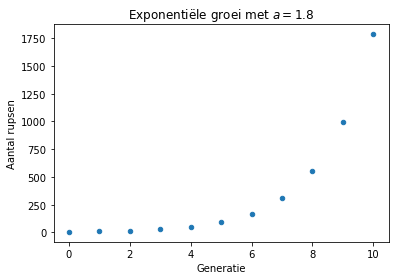

In [14]:
# importeer de nodige bibliotheken
from matplotlib import pyplot as plt
import numpy as np

# initaliseer een rij met alle getallen van 0 tot en met 10
t_data = np.arange(11)

# bereken de populatiegrootte op tijdstip t
u_data = exponentieel_model(t_data)

# maak een nieuwe grafiek aan
plt.figure()

# plot alle punten met de scatter-functie
plt.scatter(t_data, u_data, 20)

# gebruik verduidelijkende labels
plt.xlabel('Generatie')
plt.ylabel('Aantal rupsen')

# voeg een titel toe
plt.title('Exponentiële groei met $a = 1.8$')

# toon de grafiek
plt.show()

### Opdracht 2

Print de waarden van `t_data` en `u_data` even uit. Stel vast dat de plaag erg snel groeit, wat verontrustend is!

In [15]:
print(t_data)
print(u_data)

[ 0  1  2  3  4  5  6  7  8  9 10]
[   5.            9.           16.2          29.16         52.488
   94.4784      170.06112     306.110016    550.9980288   991.79645184
 1785.23361331]


### Opdracht 3

Kijk nu eens verder in de tijd, door de populatiegrootte te plotten voor 50 generaties. Wat stel je vast?

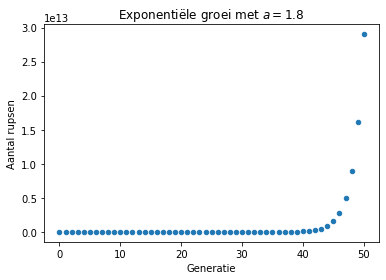

In [16]:
t_data = np.arange(51)
u_data = exponentieel_model(t_data)

plt.figure()
plt.scatter(t_data, u_data, 20)
plt.xlabel('Generatie')
plt.ylabel('Aantal rupsen')
plt.title('Exponentiële groei met $a = 1.8$')
plt.show()

### Opdracht 4

Hoeveel rupsen zijn er na 10 generaties? Hoeveel na 30? Hoeveel na 50?

In [17]:
for t in [10, 30, 50]:
    print(f'Aantal rupsen na {t} dagen: {u_data[t]:.0f}')

Aantal rupsen na 10 dagen: 1785
Aantal rupsen na 30 dagen: 227585798
Aantal rupsen na 50 dagen: 29013175129048


### Opdracht 5

Neem aan dat elke rups ongeveer 3 gram weegt. Wat is dan hun totale gewicht in kilogram na 50 generaties? Denk je dat een doorsnee tuin over voldoende buxushagen beschikt om dergelijke populaties te ondersteunen?

In [18]:
print(u_data[50] * 0.003)

87039525387.14322


Je stelt vast dat de populatiegrootte zonder enige belemmering verder aangroeit. Na 50 generaties zijn er meer dan 29.000.000.000.000 rupsen. Als je aanneemt dat één rups ongeveer 3 gram weegt, zijn er na 50 generaties meer dan 87 miljoen ton rupsen, het equivalent van 40 miljoen nijlpaarden. Er zijn bijlange niet genoeg buxushagen in de wereld om dergelijke populaties te ondersteunen!

In de praktijk heeft elk ecosystem een bepaalde <em>draagkracht</em>, de hoeveelheid voedsel, water en ruimte die voorhanden is om een bepaalde populatie te ondersteunen. De draagkracht wordt vaak voorgesteld door de letter $K$. Als je aanneemt dat $K = 1000$, dan heeft onze tuin genoeg buxussen om 1000 rupsen te voeden, maar niet meer. In het volgende hoofdstuk leer je hoe je het model kan uitbreiden om hier rekening mee te houden!

## De insecten voorbij

Groeimodellen vind je overal, niet enkel om de evolutie van insectenpopulaties te beschrijven, maar ook deze van kristallen, bacteriën, enzovoort. Een gekend voorbeeld van exponentiële groei kunnen we terugvinden in de geneeskunde. Tijdens de **COVID-19 pandemie** werd exponentiële groei vaak in de mond genomen om het aantal besmette personen te beschrijven. De befaamde $R_0$-waarde waar epidemiologen het meer dan eens over hadden komt ruwweg overeen met de groeisnelheid $a$ die wij hier bestudeerden. Via sociale distancing, mondmaskers en vaccinatie werd er alles aan gedaan om deze onder een waarde van 1 te brengen.

### Opdracht 6

In het bestand `covid.csv` vind je het aantal besmettingen en het aantal dodelijke slachtoffers terug die COVID-19 veroorzaakt heeft in België gedurende de eerste weken van de pandemie. Dit bestand bevat vijf kolommen, die respectievelijk de dag, de maand, het jaar, het aantal besmettingen en het aantal dodelijke slachtoffers weergeeft. Lees dit CSV-bestand in met behulp van de `pandas` library, en plot het aantal besmettingen en het aantal dodelijke slachtoffers in twee verschillende grafieken.

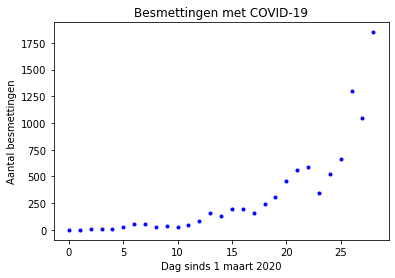

In [19]:
# importeer de nodige bibliotheken
import pandas as pd

# lees het CSV-bestand uit
corona = pd.read_csv("covid.csv")

# definieer de data die geplot moet worden
u_data = np.array(corona["gevallen"])
t_data = np.arange(len(u_data))

# maak een nieuwe grafiek aan
plt.figure()

# plot alle punten met de scatter-functie
plt.scatter(t_data, u_data, marker =".", color="blue")

# gebruik verduidelijkende labels
plt.xlabel("Dag sinds 1 maart 2020")
plt.ylabel("Aantal besmettingen")

# voeg een titel toe
plt.title("Besmettingen met COVID-19")

# toon de grafiek
plt.show()

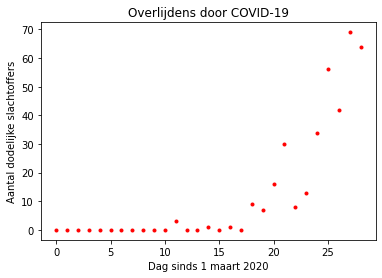

In [20]:
u_data = np.array(corona["doden"])
t_data = np.arange(len(u_data))

plt.figure()
plt.scatter(t_data, u_data, marker =".", color="red")
plt.xlabel("Dag sinds 1 maart 2020")
plt.ylabel("Aantal dodelijke slachtoffers")
plt.title("Overlijdens door COVID-19")
plt.show()

Als je de groeicurves bekijkt, zie je het gevaar van een exponentiële groei met $a > 1$: initieel neemt het aantal besmettingen gestaag toe, maar gaandeweg schiet dit aantal sneller en sneller de hoogte in. Daarom werd er ook zo significant ingegrepen, met onder meer een lockdown om verdere besmettingen te vermijden.

Wil je hier meer over weten? Via [deze link](https://www.dwengo.org/backend/api/learningObject/getWrapped?hruid=pn_expogroei&version=3&language=nl) kan je een interessante notepad bekijken, waarin onder meer het aantal besmettingen en het aantal ziekenhuisopnames in België weergegeven wordt als een functie van de tijd. Ook leer je hoe je de data kunt benaderen aan de hand van een exponentiële curve.

Een ander gekend voorbeeld van exponentiële groei is de zogenaamde **Wet van Moore**, die stelt dat het aantal transistoren in een computerchip elke twee jaar verdubbelt. Om dit te illustreren maken we gebruik van een **logaritmische schaal**, die het mogelijk maakt om een groot interval van waarden op een compacte manier voor te stellen.

Bij een traditionele lineaire schaal is de afstand tussen de getallen 1, 2, 3, 4, ... telkens even groot; het volstaat om het getal 1 op te tellen om eenzelfde afstand voor te bewegen langsheen de as. Bij een logaritmische schaal wordt een bepaalde afstand voortbewogen **wanneer een getal vermenigvuldigd wordt met een bepaalde constante**; de getallen 10, 100, 1000 en 10.000 liggen op die manier allemaal even ver van elkaar. Volgende grafieken illustreren dit concept:

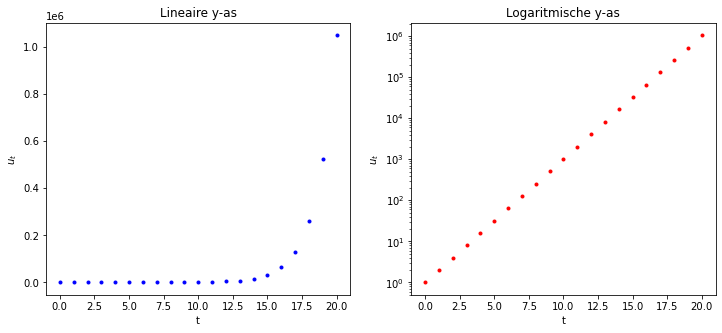

In [21]:
# definieer de data die geplot moet worden
t_data = np.arange(21)
u_data = exponentieel_model(t_data, u_0=1, a=2)

# maak een nieuwe grafiek aan
plt.figure(figsize=(12, 5))

# plot de data met een lineaire y-as
ax = plt.subplot(1, 2, 1)
plt.scatter(t_data, u_data, marker =".", color="blue")
plt.xlabel('t')
plt.ylabel('$u_t$')
plt.title('Lineaire y-as')
ax.set_yscale('linear')

# plot de data met een logaritmische y-as
ax = plt.subplot(1, 2, 2)
plt.scatter(t_data, u_data, marker =".", color="red")
plt.xlabel('t')
plt.ylabel('$u_t$')
plt.title('Logaritmische y-as')
ax.set_yscale('log')

# toon de grafiek
plt.show()

In de linkse figuur wordt een lineaire as gebruikt, in de rechtse figuur een logaritmische as. Omdat bij opeenvolgende punten op de x-as de overeenkomstige waarde op de y-as vermenigvuldigd wordt met de constante $a = 2$, stellen we vast dat het exponentieel model visueel resulteert in punten die op eenzelfde rechte liggen. Test dit even voor andere waarden van $a$ (bijvoorbeeld $a = 1.5$ en $a = 10$, en stel vast dat we een gelijkaardig resultaat bekomen.

Bekijk nu volgende grafiek, die het aantal transistoren op een computerchip toont in functie van de tijd. Stel vast dat er een logaritmische as gebruikt wordt, en dat we dus wel degelijk te maken hebben met een exponentiële groei!

![Moore](files/moore.png "Moore's Law")

Verschillende computerwetenschappers stellen dat de wet van Moore zich niet kan blijven doorzetten, omdat ontwikkelaars vroeg of laat op fysische grenzen zullen stuiten. **Oneindige groei is vrijwel altijd onmogelijk: ooit moet je op de limieten van het systeem botsen.** Toch vormt een exponentieel model vaak een uitstekende beschrijving van het begin van de groei.